# LOGISTIC REGRESSION

Logistic regression is a classification algorithm and it generally deals with only two classes. The classes may be True/False, Yes/No or 0/1. It uses sigmoid function. 

The Logistic regression model is represented as, $$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where, $g$ is the **sigmoid function**.

### Sigmoid Function:
The sigmoid function is a type of activation function that provides the output between 0 and 1. The sigmoid function is given by,

$$g(z) = \frac{1}{1+e^{-z}}$$

Here, $z$ can be a single number as well as array of numbers.

Let us take an example to understand **Logistic Regression** as well as **Gradient descent algorithm** implementation on it.



In [144]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [146]:
#input training examples
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
#output training examples
y_train = np.array([0, 0, 0, 1, 1, 1])
print(f"X dataset: {x_train}")
print(f"Y dataset: {y_train}")

X dataset: [[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
Y dataset: [0 0 0 1 1 1]


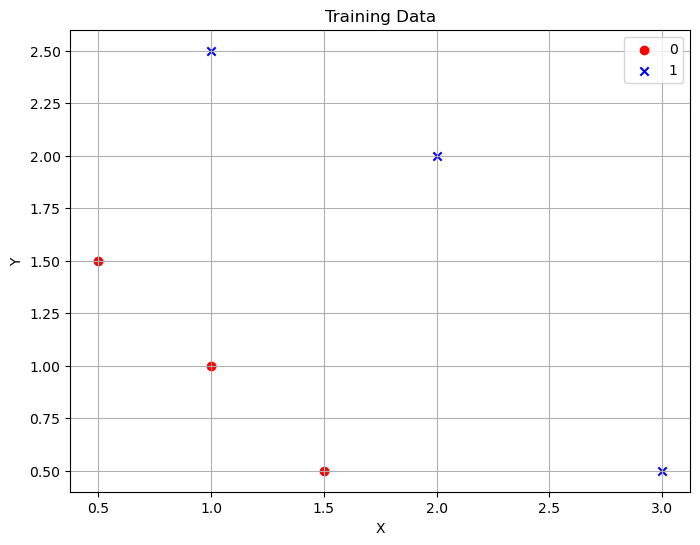

In [148]:
# Plot the data
plt.figure(figsize=(8, 6))

# Separate points based on their class
for i in range(len(y_train)):
    if y_train[i] == 0:
        plt.scatter(x_train[i, 0], x_train[i, 1], color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(x_train[i, 0], x_train[i, 1], color='blue', marker='x', label='1' if i == 3 else "")

plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [188]:
#Logistic Regression model computation
def compute_model_output(x, w, b):
    """
    Computes model output
    Args: 
        x : training input (array)
        w : model parameters (array)
        b : model parameter (scalar)
    Return: 
        f_wb : model output 
    """
    m,n = x.shape
    f_wb = sigmoid(np.dot(x, w) + b)

    for i in range(m):
        if f_wb[i] > 0.5:
            f_wb[i] = 1
        else:
            f_wb[i] = 0

    return f_wb

In [136]:
#sigmoid function implementation
def sigmoid(z):
   """
   Computes sigmoid function
   Args:
       z : inputs (array)

   Returns:
       g : sigmoid value (array)
    """

   g = 1 / (1 + np.exp(-z))

   return g

### Cost Function

For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.


In [207]:
#cost function calculation using (1) and (2)
def compute_cost(x, y, w, b):
    """
    Computes cost function
    Args:
        x : training inputs (array)
        y : target output (aray)
        w : model parameters (array)
        b : model parameter

    Returns:
        cost : cost value (scalar)
    """
    m = x.shape[0]
    cost = 0.0
    epsilon = 1e-7   #to avoid log0
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        fw_i = sigmoid(z_i)
        cost += -y[i] * np.log(fw_i + epsilon) - (1-y[i]) * np.log(1-fw_i + epsilon)
    cost = cost / m
    return cost

<a name="2.5"></a>
### Gradient Descent for logistic regression

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

And, 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{4}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{5}$$

In [212]:
#calculating gradient using (4), (5)
def compute_gradient(x, y, w, b):
    """
    Computes gradients
    Args:
        x : training inputs (array)
        y : target output (array)
        w : model parameters (array)
        b : model parameter (scalar)

    Returns:
        dj_dw : gradient w.r.t. w 
        dj_db : gradient w.r.t b
    """

    m,n = x.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        error = sigmoid(z_i) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i,j]
        dj_db += error
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

    

    

In [214]:
#implementing gradient descent algoirthm using (3)
def gradient_descent(x, y, w_in, b_in, alpha, itrs):
    """
    Performs gradient descent algorithm
    Args:
        x : training inputs (array)
        y : target output (array)
        w_in : Initialized w model parameters (array)
        b_in : Initialized b model parameter (scalar)
        alpha : learning rate (between 0 and 1)
        itrs : No. of iterations

   Returns : 
       w : updated value of w
       b : update value of b
    """

    w = w_in
    b = b_in

    for i in range(itrs):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 1000 == 0 :
            cost = compute_cost(x, y, w, b)
            print(f"Iteration : {i}, w : {w}, b : {b}, cost : {cost}")

    return w, b

In [164]:
w = np.zeros_like(x_train[0])
b = 0.
alpha = 0.1
iters = 10000

w_final, b_final = gradient_descent(x_train, y_train, w, b, alpha, iters)

print(f"W final : {w_final} , b_final : {b_final}")


Iteration : 0, w : [0.025      0.01666667], b : 0.0, cost : 0.6846102701730165
Iteration : 1000, w : [2.30572624 2.07740353], b : -5.9109933019066005, cost : 0.15909764926959774
Iteration : 2000, w : [3.15508984 2.94023038], b : -8.31149228999275, cost : 0.08460053288638097
Iteration : 3000, w : [3.68092411 3.47097047], b : -9.782304238535811, cost : 0.05705316689607166
Iteration : 4000, w : [4.06024975 3.8527842 ], b : -10.838640780957705, cost : 0.04290748981684383
Iteration : 5000, w : [4.35647898 4.15050189], b : -11.66153788565381, cost : 0.03433837379489136
Iteration : 6000, w : [4.59929949 4.39430614], b : -12.334999960928219, cost : 0.028603695113001096
Iteration : 7000, w : [4.80494417 4.6006459 ], b : -12.904720255835343, cost : 0.024501467122816038
Iteration : 8000, w : [4.98324047 4.77945746], b : -13.398265876886166, cost : 0.02142360115589878
Iteration : 9000, w : [5.14058319 4.93719618], b : -13.833530467558626, cost : 0.0190300351994314
W final : [5.28123029 5.07815608]

Now, using the obtained **w_final** and **b_final** to compute the model output using **compute_model_output** function 

In [222]:
temp_f = compute_model_output(x_train, w_final, b_final)

print(f"Actual output : {y_train}")
print(f"Predicted output : {temp_f}")



Actual output : [0 0 0 1 1 1]
Predicted output : [0. 0. 0. 1. 1. 1.]


The model predicted same as the target output